This plots all outstanding bonds for a corporation with similar features, such as coupon payment description, country of issuance, and credit rating. Then it fits a curve to the graph to see the deviations in the ISMA bid yield are from the curve.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mlxtend.plotting import category_scatter
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
filePath = r'C:\Users\Keavan\Jupyter\Economics\Corporate_Bonds'
fileName = filePath + r'\data\{}.csv'.format(input('Select file to import: '))

Select file to import: AAPL.O


In [3]:
data = pd.read_csv(fileName) #load data into dataframe

data = data[data['SP Rating'] == 'AA+'] #FILTER #1
data = data[data['Coupon Type Description'] == 'Fixed:Plain Vanilla Fixed Coupon'] #FILTER #2

today = datetime.datetime.today()
data['time_to_maturity'] = data['Maturity Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
data['time_delta'] = data['time_to_maturity'] - today
data['time_to_maturity_int'] = pd.Index(pd.Series(data['time_delta'])).days

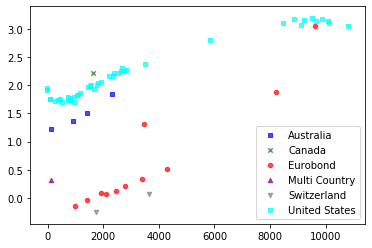

In [4]:
fig = category_scatter(x='time_to_maturity_int', y='ISMA Bid Yield', label_col='Country Name', 
                       data=data, legend_loc='lower right')

In [12]:
def bond_structure(companyName, spRating, countryName, degree, output):
    
    fileName = filePath + r'\data\{}.csv'.format(companyName)
    country_data = pd.read_csv(fileName)
    country_data = country_data[country_data['SP Rating'] == spRating] #FILTER #1
    country_data = country_data[country_data['Coupon Type Description'] == 'Fixed:Plain Vanilla Fixed Coupon'] #FILTER #2
    country_data = country_data[country_data['Country Name'] == countryName] #FILTER #3
    
    today = datetime.datetime.today()
    country_data['time_to_maturity'] = country_data['Maturity Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
    country_data['time_delta'] = country_data['time_to_maturity'] - today
    country_data['time_to_maturity_int'] = pd.Index(pd.Series(country_data['time_delta'])).days
    country_data = country_data.sort_values(by=['time_to_maturity_int']) #find the earliest time to maturity

    x = country_data['time_to_maturity_int']
    y = country_data['ISMA Bid Yield']
    x= x[:,np.newaxis]
    y= y[:,np.newaxis]
    
    xp = PolynomialFeatures(degree=degree).fit_transform(x) #fit curve to third degree
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp) 

    if output == 'plot':
        return plt.scatter(x,y), plt.plot(x,ypred), plt.grid()
    elif output == 'summary':
        return model.summary()
    elif output == 'data':
        return country_data

(<matplotlib.collections.PathCollection at 0x1cd8e44a188>,
 None)

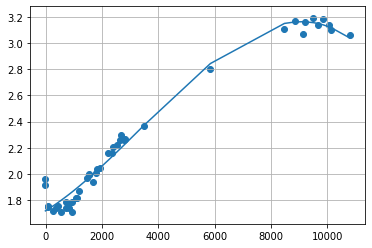

In [15]:
bond_structure('AAPL.O', 'AA+', 'United States', 3, 'plot')

In [7]:
bond_structure('AAPL.O', 'AA+', 'United States', 3, 'summary')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     720.8
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           7.76e-35
Time:                        17:38:43   Log-Likelihood:                 53.782
No. Observations:                  44   AIC:                            -99.56
Df Residuals:                      40   BIC:                            -92.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7204      0.027     63.517      0.000       1.666       1.775
x1             0.0001   2.87e-05      4.616      0.000    7.46e-05       0.000
x2          2.324e-08   7.56e-09      3.072      0.004    7.95e-09    3.85e-08
x3         -2.243e-12   5.26e-13     -4.261      0.000   -3.31e-12   -1.18e-12
==============================================================================
Omnibus:                       13.658   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.561
Skew:                           0.981   Prob(JB):                     0.000154
Kurtosis:                       5.394   Cond. No.                     1.04e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
bond_structure('AAPL.O', 'AA+', 'United States', 3, 'data')

,Instrument,Issuer Name,Industry Sub Sector Description,Country Name,Issuer Country Name,Issue Date,Maturity Date,Preferred RIC,Amount Outstanding,Coupon,...,Zero Option Adjusted Price,Option Adjusted Convexity,Exercise Type,Duration,Modified Duration,Convexity.1,Make Whole Call Flag,time_to_maturity,time_delta,time_to_maturity_int
92,US037833AX89,APPLE INC,Electronics,United States,United States,2015-02-09,2020-02-07,037833AX8=,1.250000e+09,1.550,...,NaN,NaN,NaN,0.0611,0.0610,0.0075,NaN,2020-02-07,-8 days +06:21:15.714067,-8
60,US037833CK41,APPLE INC,Electronics,United States,United States,2017-02-09,2020-02-07,037833CK4=,1.000000e+09,1.900,...,NaN,NaN,NaN,0.0611,0.0610,0.0075,NaN,2020-02-07,-8 days +06:21:15.714067,-8
85,US037833BD17,APPLE INC,Electronics,United States,United States,2015-05-13,2020-05-06,037833BD1=,1.250000e+09,2.000,...,NaN,NaN,NaN,0.3083,0.3067,0.1881,NaN,2020-05-06,81 days 06:21:15.714067,81
55,US037833CS76,APPLE INC,Electronics,United States,United States,2017-05-11,2020-05-11,037833CS7=,1.000000e+09,1.800,...,NaN,NaN,NaN,0.3222,0.3205,0.2054,NaN,2020-05-11,86 days 06:21:15.714067,86
40,US037833DJ68,APPLE INC,Electronics,United States,United States,2017-11-13,2020-11-13,037833DJ6=,1.000000e+09,2.000,...,NaN,NaN,NaN,0.8228,0.8160,1.0728,NaN,2020-11-13,272 days 06:21:15.714067,272
75,US037833BS85,APPLE INC,Electronics,United States,United States,2016-02-23,2021-02-23,037833BS8=,3.000000e+09,2.250,...,NaN,NaN,NaN,1.0129,1.0044,1.5177,NaN,2021-02-23,374 days 06:21:15.714067,374
96,US037833AR12,APPLE INC,Electronics,United States,United States,2014-05-06,2021-05-06,037833AR1=,3.000000e+09,2.850,...,NaN,NaN,NaN,1.2875,1.2765,2.2789,NaN,2021-05-06,446 days 06:21:15.714067,446
67,US037833CC25,APPLE INC,Electronics,United States,United States,2016-08-04,2021-08-04,037833CC2=,1.250000e+09,1.550,...,NaN,NaN,NaN,1.5298,1.5170,3.0793,NaN,2021-08-04,536 days 06:21:15.714067,536
62,US037833CM07,APPLE INC,Electronics,United States,United States,2017-02-09,2022-02-09,037833CM0=,1.500000e+09,2.500,...,NaN,NaN,NaN,1.9297,1.9133,4.6862,NaN,2022-02-09,725 days 06:21:15.714067,725
102,US037833AY62,APPLE INC,Electronics,United States,United States,2015-02-09,2022-02-09,037833AY6=,1.250000e+09,2.150,...,NaN,NaN,NaN,2.0143,1.9968,5.0514,NaN,2022-02-09,725 days 06:21:15.714067,725


Trying different ways to fit the curve to the yields of outstanding bonds

In [24]:
from scipy.optimize import curve_fit

In [71]:
def bond_structure(companyName, spRating, countryName, degree):
    
    fileName = filePath + r'\data\{}.csv'.format(companyName)
    country_data = pd.read_csv(fileName)
    country_data = country_data[country_data['SP Rating'] == spRating] #FILTER #1
    country_data = country_data[country_data['Coupon Type Description'] == 'Fixed:Plain Vanilla Fixed Coupon'] #FILTER #2
    country_data = country_data[country_data['Country Name'] == countryName] #FILTER #3
    
    today = datetime.datetime.today()
    country_data['time_to_maturity'] = country_data['Maturity Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
    country_data['time_delta'] = country_data['time_to_maturity'] - today
    country_data['time_to_maturity_int'] = pd.Index(pd.Series(country_data['time_delta'])).days
    country_data = country_data.sort_values(by=['time_to_maturity_int']) #find the earliest time to maturity

    x = country_data['time_to_maturity_int']
    y = country_data['ISMA Bid Yield']
   
    #return x.shape

    
    x= x[:,np.newaxis]
    y= y[:,np.newaxis]

    
    
    '''
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 44)
    y_new = f(x_new)

    plt.plot(x,y,'o', x_new, y_new)
    #plt.xlim([x[0]-1, x[-1] + 1 ])
    plt.show()
    '''
    
    xp = PolynomialFeatures(degree=degree).fit_transform(x) #fit curve to third degree
    model = sm.OLS(y, xp).fit()
    ypred = model.predict(xp) 
    
    return plt.scatter(x,y), plt.plot(x,ypred), plt.grid(), plt.ylim(0,4)
    
    '''
    if output == 'plot':
        return plt.scatter(x,y), plt.plot(x,ypred), plt.grid()
    elif output == 'summary':
        return model.summary()
    elif output == 'data':
        return country_data
    '''

(<matplotlib.collections.PathCollection at 0x1cd8f89dd08>,
 None,
 (0, 4))

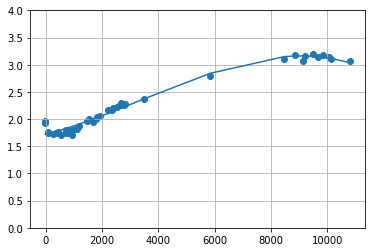

In [72]:
bond_structure('AAPL.O', 'AA+', 'United States', 3)